In [1]:
import numpy as np
from scipy.integrate import quad
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
T_M = (20 * u.year).to('s').value
h_GW = 1e-14 * ( (5 * u.year).to('s').value / T_M)
h    = 0.67
H0   = (67 * u.km / u.second /u.Mpc).to('Hz').value

H0

np.float64(2.1713221239277246e-18)

In [3]:
def N(f0):
    inte = lambda f : (f0 / f)**3 * ( 7 / (4 + 3 * ( 4 + 3 * (f0/f)**2))) **(7/2) * (2 * np.pi**2 * f**3 * h_GW**2 * h**2)**(-1)
    # 不定积分
    result, abserr = quad(inte, 1/T_M, 1e-6)
    return float((3 * H0**2 * result)**(-1))


uN = np.frompyfunc(N, 1, 1)

In [4]:
flist = np.logspace(-9, -6, 50)

slist = np.array(uN(flist), dtype=float)

/tmp/ipykernel_15446/3948179332.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


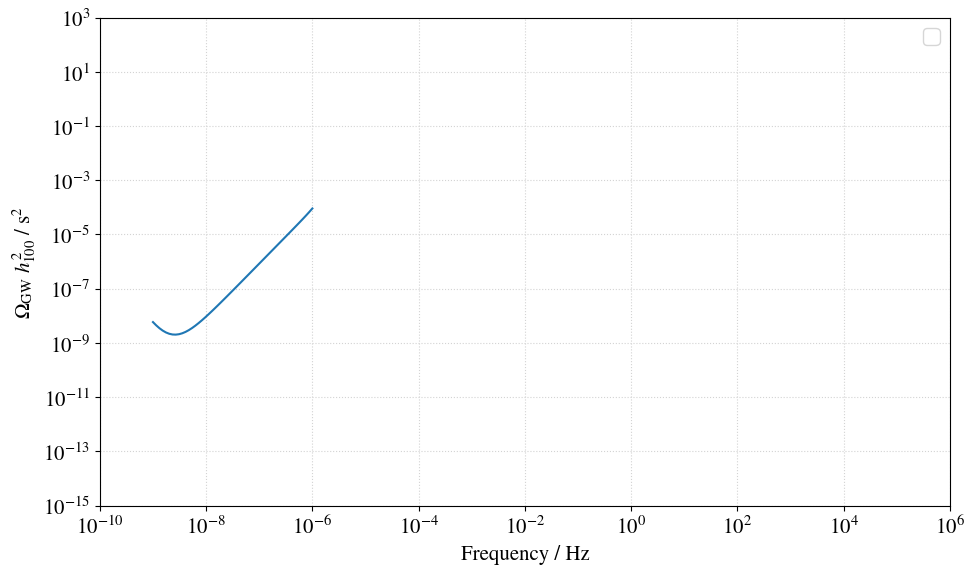

In [5]:
#绘制 频率 - sqrt(PSD) 图 

#绘图字体参数设置
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10,6))
plt.loglog(flist, slist)
plt.xlim(1e-10, 1e6)
plt.ylim(1e-15, 1e3)
plt.xlabel("Frequency / Hz")
plt.ylabel("$\Omega_{\mathrm{GW}}~h_{100}^{2}~/~\mathrm{s^2}$")
plt.legend(loc = 'upper right')
plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

In [6]:
h_c = np.sqrt(slist / 6.264834127565947e35) / flist
h_c

array([9.66357592e-14, 7.30324725e-14, 5.61708654e-14, 4.40800241e-14,
       3.53732608e-14, 2.90742894e-14, 2.44949618e-14, 2.11493108e-14,
       1.86931822e-14, 1.68819128e-14, 1.55407242e-14, 1.45440545e-14,
       1.38011450e-14, 1.32459827e-14, 1.28302649e-14, 1.25184524e-14,
       1.22842699e-14, 1.21082113e-14, 1.19757456e-14, 1.18760186e-14,
       1.18009039e-14, 1.17443071e-14, 1.17016516e-14, 1.16694965e-14,
       1.16452533e-14, 1.16269731e-14, 1.16131879e-14, 1.16027918e-14,
       1.15949513e-14, 1.15890382e-14, 1.15845789e-14, 1.15812168e-14,
       1.15786835e-14, 1.15767780e-14, 1.15753516e-14, 1.15742974e-14,
       1.15735456e-14, 1.15730650e-14, 1.15728735e-14, 1.15730656e-14,
       1.15738665e-14, 1.15757349e-14, 1.15795451e-14, 1.15868949e-14,
       1.16005910e-14, 1.16253568e-14, 1.16687519e-14, 1.17421914e-14,
       1.18618174e-14, 1.20488950e-14])

/tmp/ipykernel_15446/4068615147.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


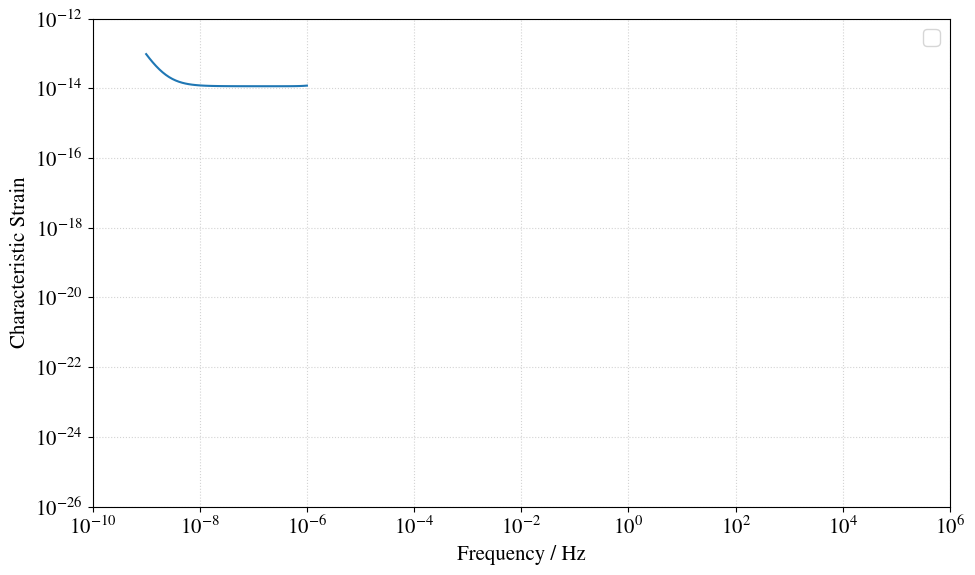

In [8]:
#绘制 频率 - sqrt(PSD) 图 

#绘图字体参数设置
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10,6))
plt.loglog(flist, h_c)
plt.xlim(1e-10, 1e6)
plt.ylim(1e-26, 1e-12)
plt.xlabel("Frequency / Hz")
plt.ylabel("Characteristic Strain")
# plt.ylabel("$\sqrt{S_{n}(f) \ / \ (Hz^{-1})}$")
plt.legend(loc = 'upper right')
plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

In [9]:
data2 = np.vstack([flist, h_c]).T

data3 = [[float(item[0]), float(item[1])] for item in data2]
data3

[[1e-09, 9.663575924311363e-14],
 [1.151395399326448e-09, 7.303247247097327e-14],
 [1.3257113655901108e-09, 5.617086541672116e-14],
 [1.5264179671752366e-09, 4.408002405477393e-14],
 [1.7575106248547893e-09, 3.5373260777927866e-14],
 [2.0235896477251556e-09, 2.907428935031668e-14],
 [2.3299518105153718e-09, 2.4494961754726214e-14],
 [2.6826957952797275e-09, 2.114931078746898e-14],
 [3.088843596477485e-09, 1.869318223196165e-14],
 [3.556480306223121e-09, 1.688191280282599e-14],
 [4.094915062380419e-09, 1.5540724186109363e-14],
 [4.71486636345739e-09, 1.4544054507187882e-14],
 [5.4286754393238595e-09, 1.3801144954778977e-14],
 [6.250551925273976e-09, 1.3245982732127644e-14],
 [7.1968567300115284e-09, 1.2830264932720925e-14],
 [8.28642772854686e-09, 1.251845237252177e-14],
 [9.540954763499924e-09, 1.2284269904896993e-14],
 [1.0985411419875573e-08, 1.210821125489667e-14],
 [1.2648552168552958e-08, 1.1975745646210485e-14],
 [1.4563484775012444e-08, 1.1876018609694008e-14],
 [1.6768329368110

In [11]:
data4 = {'data':data3}
data4

{'data': [[1e-09, 9.663575924311363e-14],
  [1.151395399326448e-09, 7.303247247097327e-14],
  [1.3257113655901108e-09, 5.617086541672116e-14],
  [1.5264179671752366e-09, 4.408002405477393e-14],
  [1.7575106248547893e-09, 3.5373260777927866e-14],
  [2.0235896477251556e-09, 2.907428935031668e-14],
  [2.3299518105153718e-09, 2.4494961754726214e-14],
  [2.6826957952797275e-09, 2.114931078746898e-14],
  [3.088843596477485e-09, 1.869318223196165e-14],
  [3.556480306223121e-09, 1.688191280282599e-14],
  [4.094915062380419e-09, 1.5540724186109363e-14],
  [4.71486636345739e-09, 1.4544054507187882e-14],
  [5.4286754393238595e-09, 1.3801144954778977e-14],
  [6.250551925273976e-09, 1.3245982732127644e-14],
  [7.1968567300115284e-09, 1.2830264932720925e-14],
  [8.28642772854686e-09, 1.251845237252177e-14],
  [9.540954763499924e-09, 1.2284269904896993e-14],
  [1.0985411419875573e-08, 1.210821125489667e-14],
  [1.2648552168552958e-08, 1.1975745646210485e-14],
  [1.4563484775012444e-08, 1.187601860969

In [12]:
import json

with open("./data/detectors/Gaia.json", "w") as file:
    json.dump(data4, file)